In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob
import multiprocessing
import pandas as pd
from tqdm import tqdm
import time
from copy import deepcopy
from hydra import initialize, compose
import matplotlib

from package.plots import diagnostic_plot, plot
from package.utils import util

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [3]:
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir

figure_dir = os.path.join(repo_dir, 'figures')

In [4]:
csv_path = os.path.join('/data','bwedig', 'roman-population', 'data', 'dictparaggln_Area00000010.csv')
df = pd.read_csv(csv_path)

df.columns

Index(['velodisp', 'massstel', 'angleins', 'redssour', 'redslens', 'xposlens',
       'yposlens', 'xpossour', 'ypossour', 'numbimag', 'magnsour',
       'maxmdistimag', 'magtlensF106', 'magtsourF106',
       'magtsourMagnifiedF106'],
      dtype='object')

select histograms to show: redshifts, Einstein radii, number of images, magnitudes

In [5]:
velocity_dispersions = df.loc[:,'velodisp']
masses = df.loc[:,'massstel'] * 1e12
source_redshifts = df.loc[:,'redssour']
lens_redshifts = df.loc[:,'redslens']
einstein_radii = df.loc[:,'angleins']
num_images = df.loc[:,'numbimag']
source_magnitudes = df.loc[:,'magtsourF106']
lens_magnitudes = df.loc[:,'magtlensF106']
source_x = df.loc[:,'xpossour']
source_y = df.loc[:,'ypossour']
lens_x = df.loc[:,'xposlens']
lens_y = df.loc[:,'yposlens']

/tmp/ipykernel_37794/3571589733.py:10: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


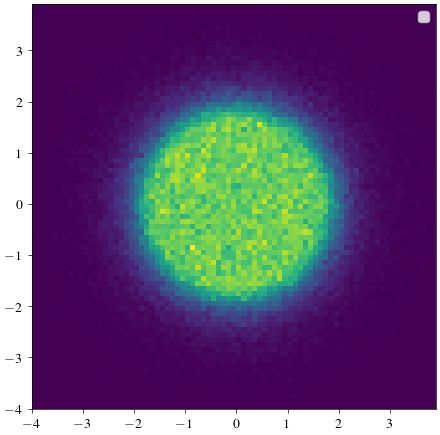

In [6]:
max = 4
resolution = 0.1

fig, ax = plt.subplots()

plt.hist2d(source_x, source_y, bins=[np.arange(-max, max, resolution), np.arange(-max, max, resolution)], label='Source')
# plt.hist2d(lens_x, lens_y, bins=[np.arange(-max, max, resolution), np.arange(-max, max, resolution)], label='Lens')

ax.set_aspect('equal', adjustable='box')
ax.legend()

plt.show()

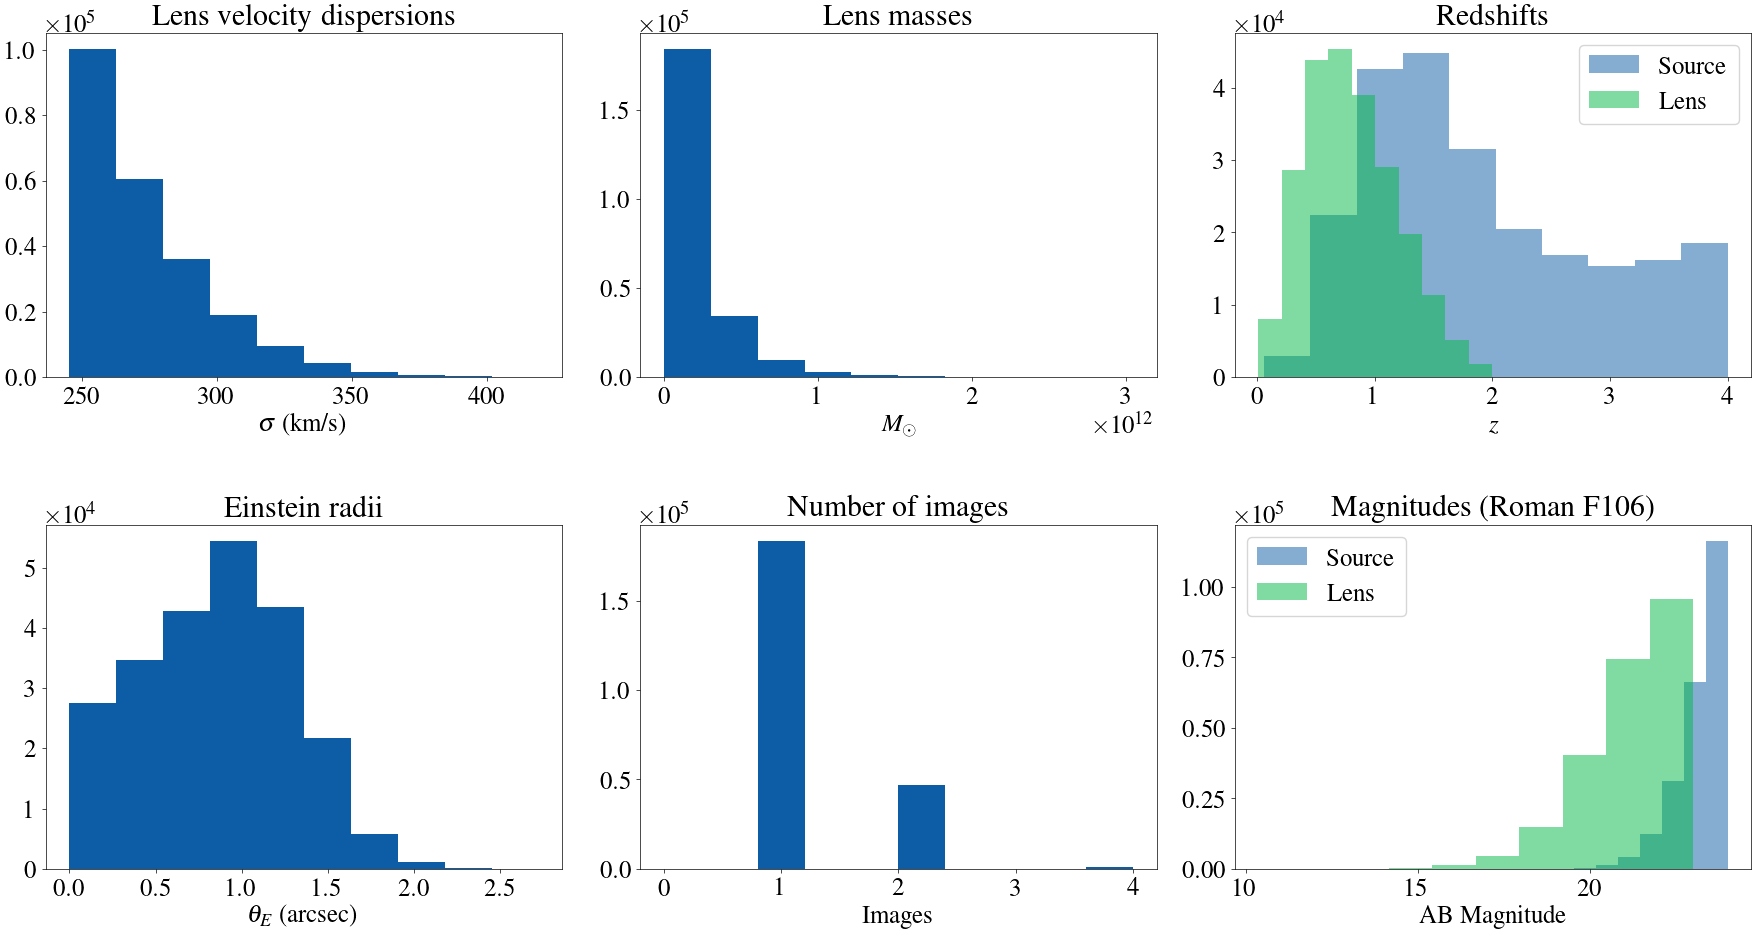

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # , gridspec_kw={'hspace': 0.02, 'wspace': 0.02}

fontsize = 18
matplotlib.rcParams.update({'font.size': fontsize})

ax[0][0].hist(velocity_dispersions)
ax[0][0].set_xlabel('$\sigma$ (km/s)')
ax[0][0].set_title('Lens velocity dispersions')

ax[0][1].hist(masses)
ax[0][1].set_xlabel('$M_\odot$')
ax[0][1].set_title('Lens masses')

ax[0][2].hist(source_redshifts, label='Source', alpha=0.5)
ax[0][2].hist(lens_redshifts, label='Lens', alpha=0.5)
ax[0][2].set_xlabel('$z$')
ax[0][2].set_title('Redshifts')
ax[0][2].legend()

ax[1][0].hist(einstein_radii)
ax[1][0].set_xlabel(r'$\theta_E$ (arcsec)')
ax[1][0].set_title('Einstein radii')

ax[1][1].hist(num_images)
ax[1][1].set_xlabel('Images')
ax[1][1].set_title('Number of images')

ax[1][2].hist(source_magnitudes, label='Source', alpha=0.5)
ax[1][2].hist(lens_magnitudes, label='Lens', alpha=0.5)
ax[1][2].set_xlabel('AB Magnitude')
ax[1][2].set_title('Magnitudes (Roman F106)')
ax[1][2].legend()

for each in ax.flatten():
    # each.get_yaxis().set_visible(False)
    each.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout(w_pad=1.5, h_pad=1.5)

plt.savefig(os.path.join(figure_dir, 'skypy_pop_hist.png'))
plt.show()

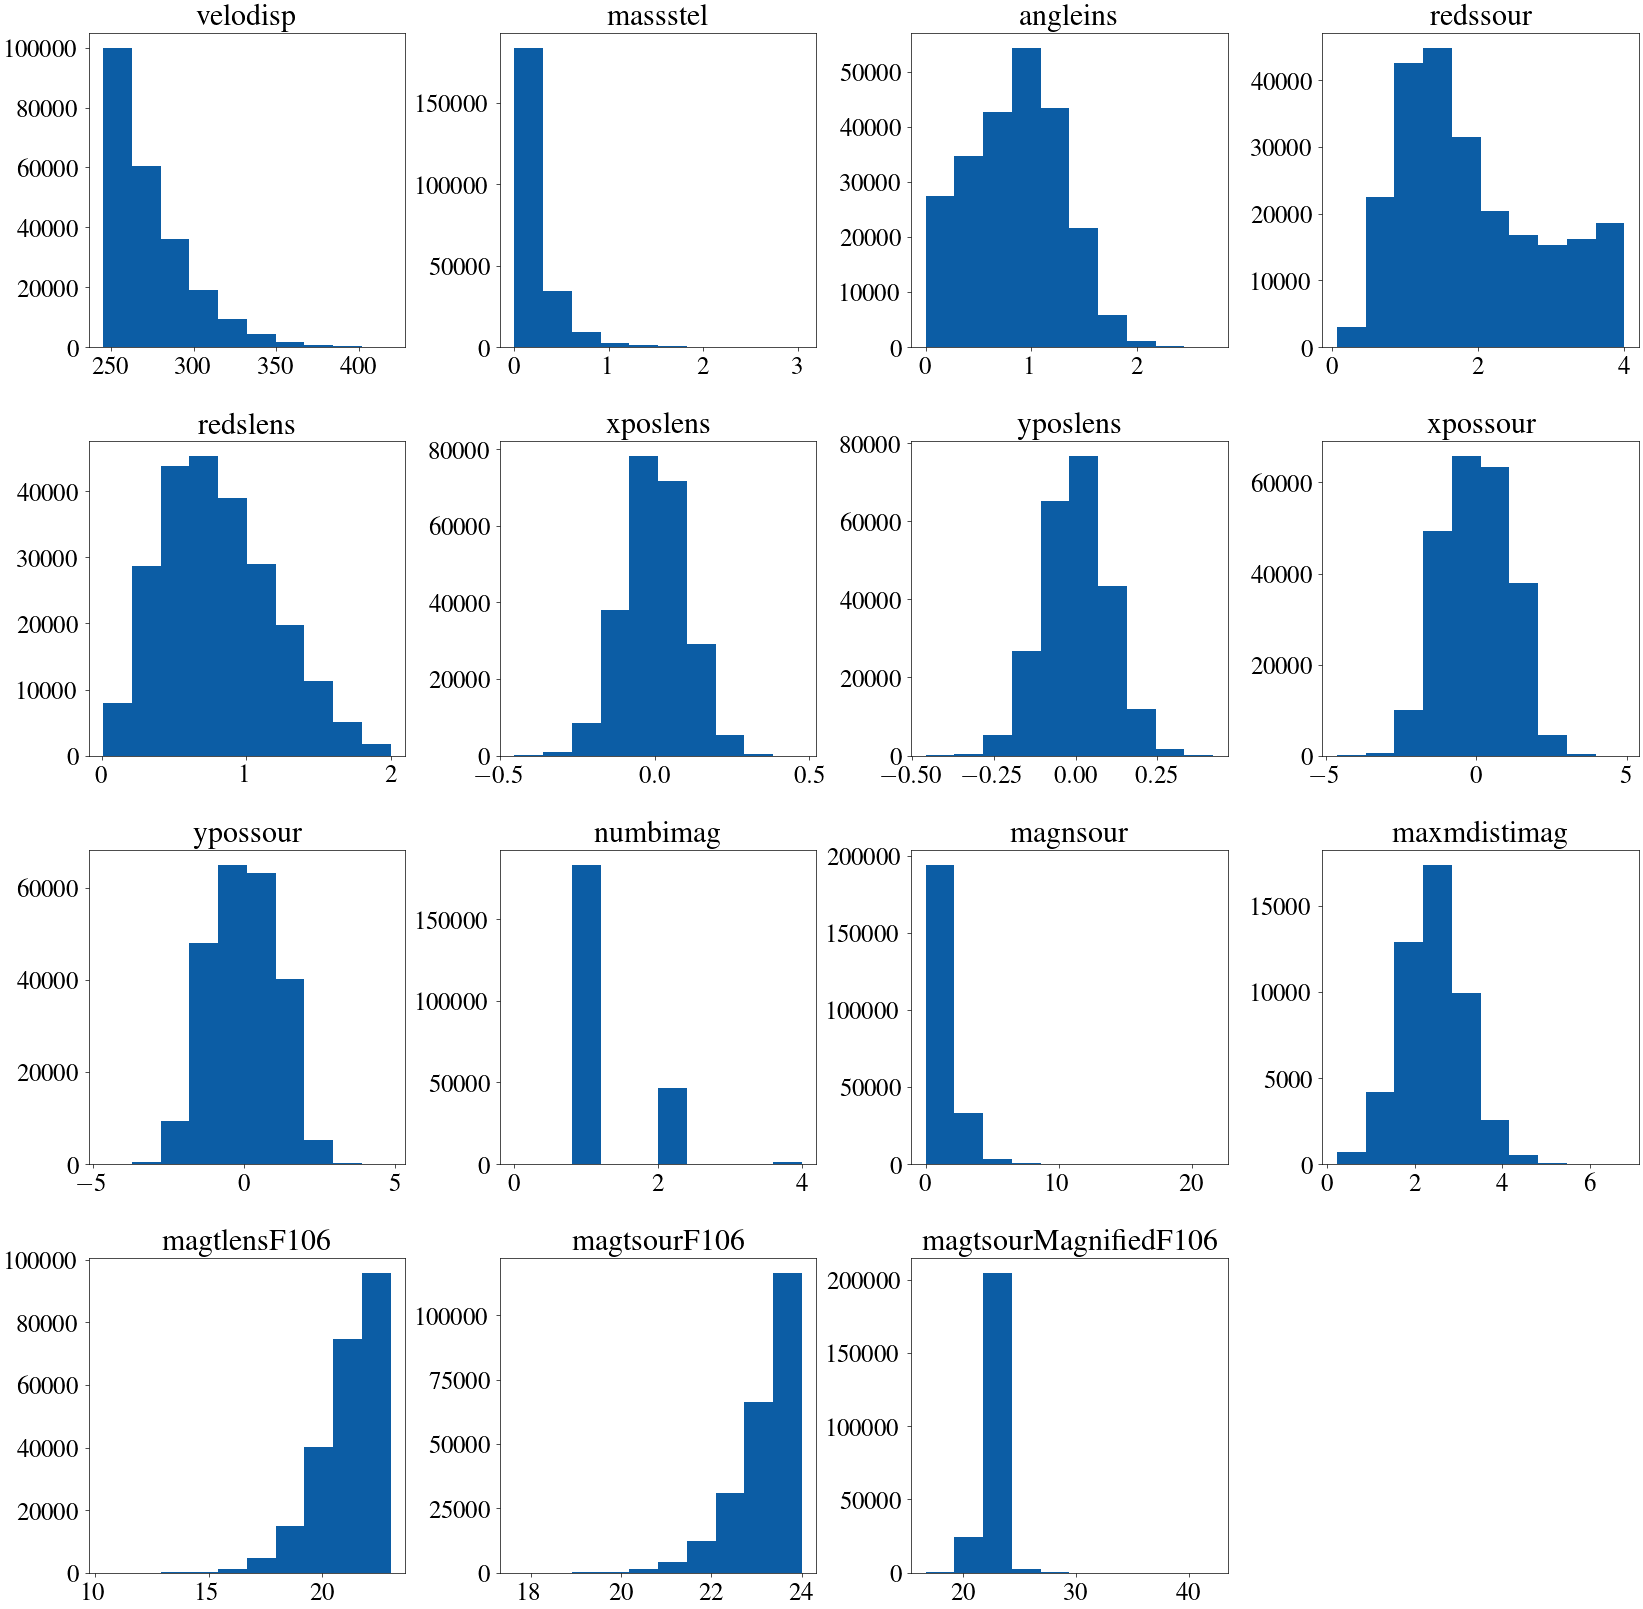

In [8]:
hist = df.hist(grid=False, figsize=(20, 20))
# plt.savefig(os.path.join(figure_dir, 'skypy_pop_hist.png'))